In [1]:
%config InlineBackend.figure_format = 'retina'

import pickle
import matplotlib.pyplot as plt
import mcta
from deap import creator, base

mcta.SetEnviroment(env_base='AD',env_verbose=False)

creator.create("FitnessMin", base.Fitness, weights=(-1,-1))
creator.create("Individual", list, fitness=creator.FitnessMin)

# data = pickle.load(open("ga_data.pkl","rb"))
# fitness = data['best_ind']['fitness']
# solution = data['best_ind']['best_ind_solution']
solution = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

ind   = [i for i in range(len(solution)) if solution[i]>0]
genes = [x for x in solution if x>0]
count = len(genes)

print ('found {:} change genes'.format(count))
# print (fitness,'\n',solution,'\n',genes,'\n',ind)

mcta: runing as a python module...
data loading and processing:
	corrected probability rounding errors in:
		0 links from the 1st try
		0 links from the 2nd try
	modified P matrix for links travel time based on legth and speed.
found 35 change genes


In [2]:

# n(n+1)/2
print (count*(count+1)/2)

#  OR

sum=0
for i in range(count+1):
    sum+=i
#     print (i, sum)
print (sum)

630.0
630


In [3]:
curve = [[1e10,1e10]]*(count+1)
Sol_Array = [0]*(count+1)

tmp = mcta.ModifyNetworkAndSolveMC(solution)[:2]
curve[count] = (tmp[0],tmp[1].real)
Sol_Array[count] = solution.copy()
evalcounter = 1

for j in range(count-1,-1,-1):
    best_i = -1
    for i in ind:
        S = solution.copy()
        if S[i] > 0:
            S[i] = 0
            tmp = mcta.ModifyNetworkAndSolveMC(S)[:2]
            evalcounter += 1
            if tmp[0] < curve[j][0]:
                curve[j] = (tmp[0],tmp[1].real)
                best_i = i
                Sol_Array[j] = S.copy()
#                 print (j,len([x for x in S if x>0]))
    if best_i!= -1:
        solution[best_i]=0
    
# print (fitness)
D,K = zip(*curve)

# print (D)
print (evalcounter," evaluations")

631  evaluations


In [4]:
C = [len([x for x in Sol_Array[a] if x>0]) for a in range(count+1)]
for i in range(count+1):
    print ("{:}\t{:}\t{:f}\t{:4.2f}%\t{:4.2f}%".format(i,C[i],D[i]
                                                       ,(D[0]-D[i])/D[0]*100
                                                       ,(D[i]-D[count])/D[count]*100))

0	0	34.155914	0.00%	77.16%
1	1	27.669664	18.99%	43.52%
2	2	26.851053	21.39%	39.27%
3	3	25.958000	24.00%	34.64%
4	4	24.945353	26.97%	29.39%
5	5	24.484276	28.32%	26.99%
6	6	23.665496	30.71%	22.75%
7	7	23.425239	31.42%	21.50%
8	8	23.383036	31.54%	21.28%
9	9	22.533470	34.03%	16.88%
10	10	21.946012	35.75%	13.83%
11	11	21.625697	36.69%	12.17%
12	12	21.503800	37.04%	11.54%
13	13	21.535447	36.95%	11.70%
14	14	21.086999	38.26%	9.37%
15	15	20.634188	39.59%	7.02%
16	16	20.259424	40.69%	5.08%
17	17	20.020521	41.38%	3.84%
18	18	19.967913	41.54%	3.57%
19	19	19.925954	41.66%	3.35%
20	20	19.868069	41.83%	3.05%
21	21	19.605992	42.60%	1.69%
22	22	19.449385	43.06%	0.88%
23	23	19.344617	43.36%	0.34%
24	24	19.452580	43.05%	0.90%
25	25	19.400779	43.20%	0.63%
26	26	19.166106	43.89%	-0.59%
27	27	19.141396	43.96%	-0.72%
28	28	19.194401	43.80%	-0.44%
29	29	19.220105	43.73%	-0.31%
30	30	19.153995	43.92%	-0.65%
31	31	19.169888	43.88%	-0.57%
32	32	19.201184	43.78%	-0.41%
33	33	19.242610	43.66%	-0.19%
34	34	19.2800

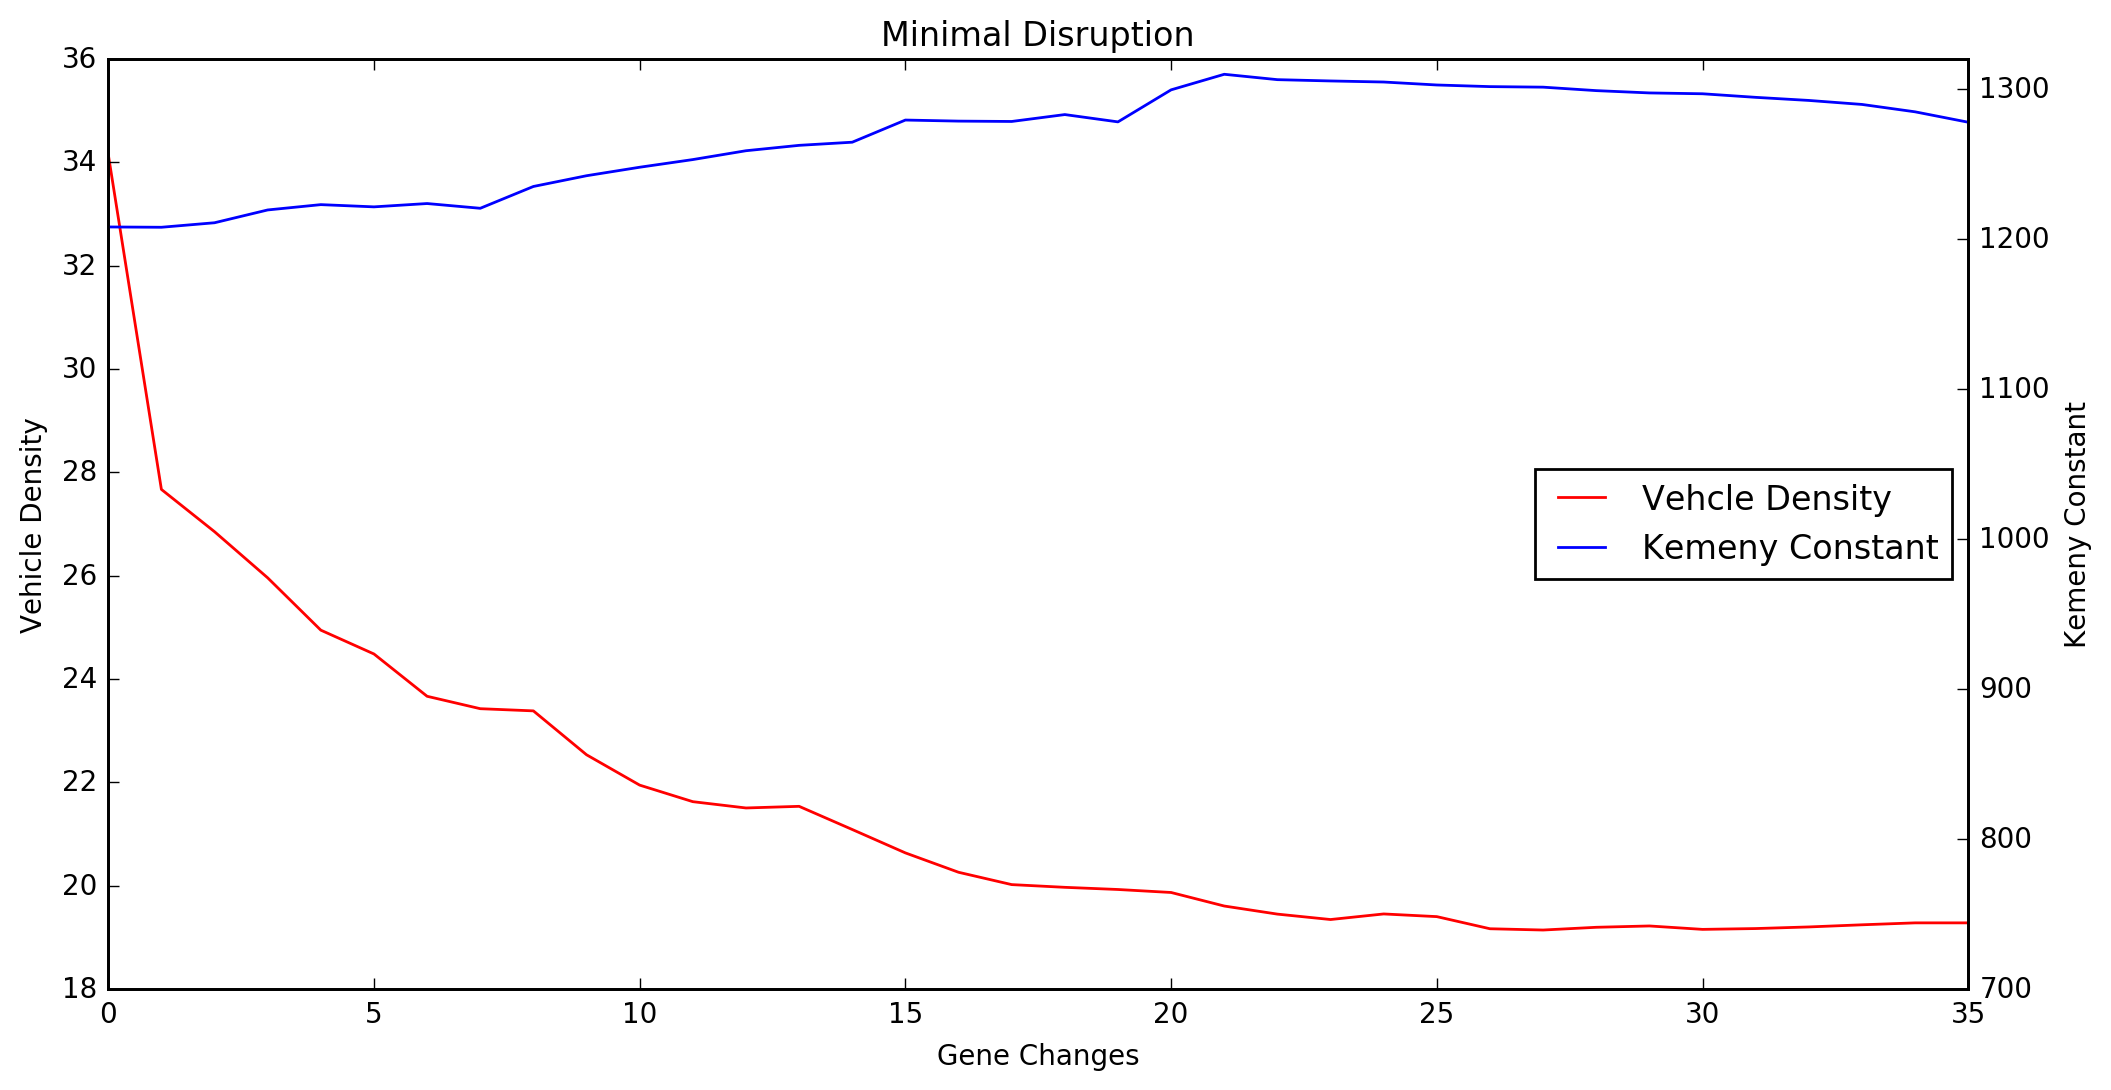

In [5]:
fig, ax1 = plt.subplots(figsize=[12,6])
line1 = ax1.plot(range(count+1), D, color="r", label="Vehcle Density")
ax2 = ax1.twinx()
line2 = ax2.plot(range(count+1), K, color="b", label="Kemeny Constant")
ax1.set_xlabel("Gene Changes")
ax1.set_ylabel("Vehicle Density")
ax2.set_ylabel("Kemeny Constant")
ax2.set_ylim([700,1320])
lns = line1+line2

labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="center right")
plt.title('Minimal Disruption')

plt.show()

19.279853 the following links direction are reversed: 32, 35, 44, 57, 59, 65, 73, 82, 86, 96, 99, 100, 109, 114, 121, 146, 148, 163, 174, 219, 227, 234, 240, 244, 256, 258, 260, 269, 283, 284, 312, 315, 325, 327, 334, 


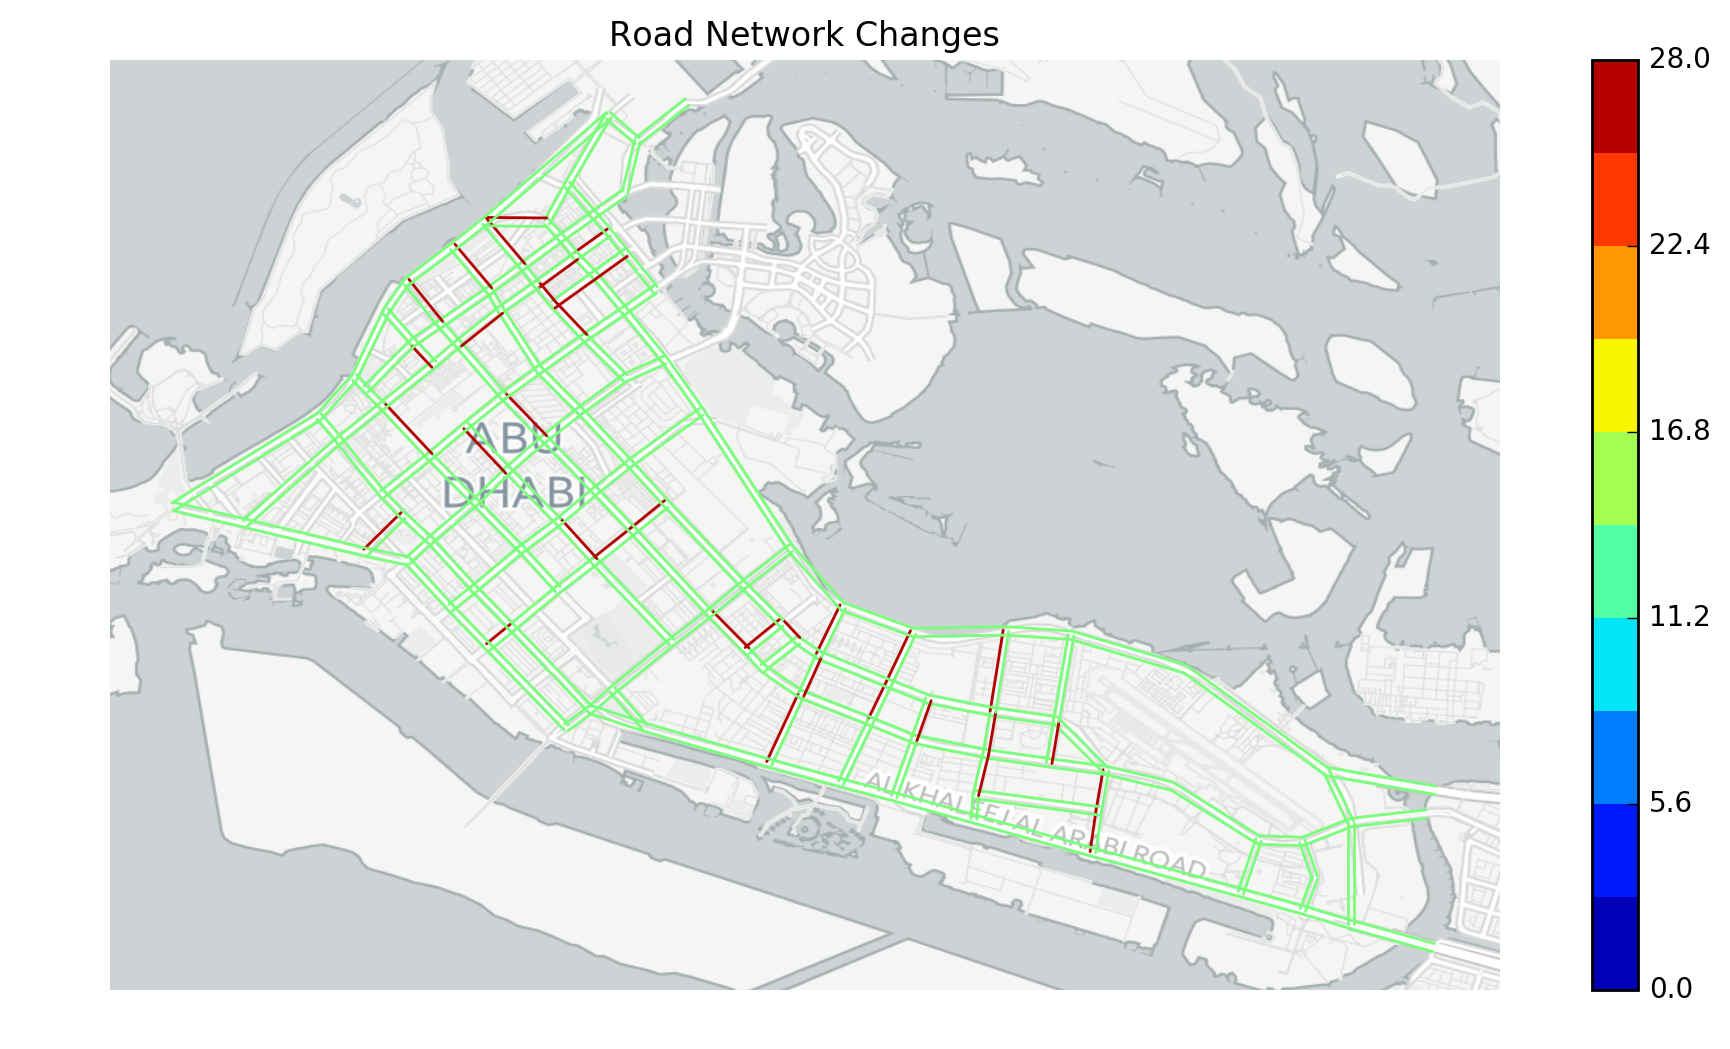

In [6]:
a=count
print (D[a], mcta.ExplainModification(Sol_Array[a]))
mcta.ShowModificationOnMap(Sol_Array[a])
mcta.plt.show()

19.868069 the following links direction are reversed: 35, 57, 65, 73, 96, 99, 109, 121, 148, 163, 174, 219, 234, 256, 269, 283, 312, 325, 327, 334, 


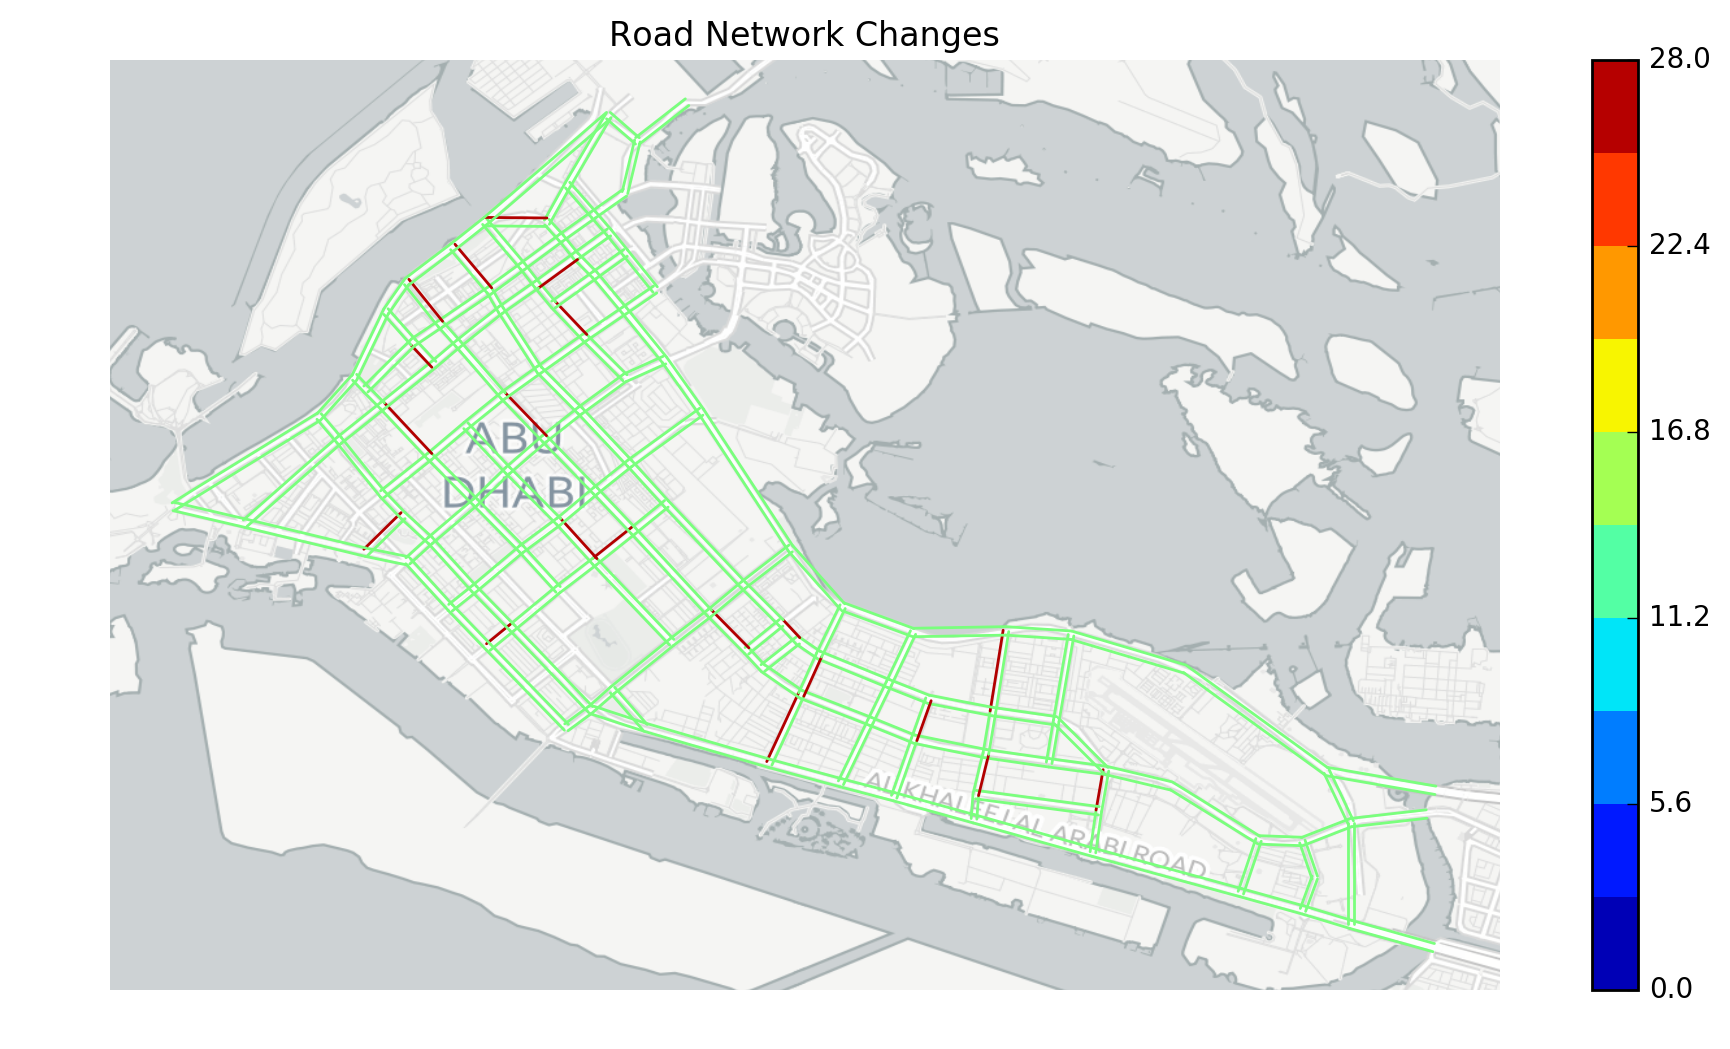

In [7]:
a=20
print (D[a], mcta.ExplainModification(Sol_Array[a]))
mcta.ShowModificationOnMap(Sol_Array[a])
mcta.plt.show()